# Exploratory Data Analysis

## Data Initialization

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/store.csv")
data = pd.read_csv("store.csv")

#### Basic Check

In [ ]:
data.head()

,ZIP_CODE,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,1001,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17,666,333.00,0.08,9,1,11,1,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,1028,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14,696,174.00,0.33,6,0,14,1,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,1056,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10,343,171.50,0.11,1,0,2,1,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,1118,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24,701,87.62,0.29,15,3,35,1,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,1107,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0.0,0.0,0.170000,0.00,0.00,0.00,0.0,0.0,87.44,0.0,87.44,0.00,87.44,0.00,0.22,0,49,49.00,0.42,4,0,8,1,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


In [ ]:
data.describe()

,ZIP_CODE,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
count,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000
mean,48935.216007,5.064213,472.888236,0.383763,113.889105,12.571803,0.213665,0.027163,0.041295,0.093482,0.135575,0.086004,0.069286,0.066285,0.068392,0.034135,0.018358,0.009751,0.029787,0.012664,0.072666,14.217662,147.822047,286.851738,24.257214,90.008151,31.990516,222.471736,41.668633,0.521913,11.577277,437.630405,170.853458,0.187325,7.145998,0.750046,17.205152,2.340064,0.041536,4.672723,1.193606,17.276674,37.888989,80.240028,15.106670,0.130584,0.166099
std,24086.448839,6.420276,640.050799,0.486312,87.249794,2.461413,0.230224,0.068648,0.109897,0.136428,0.182822,0.140095,0.132425,0.116869,0.156893,0.130995,0.099710,0.036872,0.078223,0.049601,0.174214,149.863657,395.139174,441.460820,113.855957,184.615883,97.163860,362.774251,108.106536,0.142486,7.142376,192.901601,146.171562,0.129171,5.345992,1.673245,24.616108,1.603060,0.199532,3.547191,1.828949,24.543108,28.149856,78.730265,12.214348,0.556766,0.372178
min,0.000000,1.000000,0.990000,0.000000,0.490000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.090000,0.000000,0.000000,0.000000
25%,30339.000000,1.000000,135.605000,0.000000,60.990000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.460000,5.000000,287.000000,67.000000,0.090000,3.000000,0.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,18.410000,24.957500,5.000000,0.000000,0.000000
50%,48335.000000,3.000000,263.490000,0.000000,92.070000,11.000000,0.160000,0.000000,0.000000,0.050000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.600000,0.000000,0.000000,0.000000,108.000000,0.000000,0.550000,12.000000,447.000000,124.000000,0.180000,6.000000,0.000000,9.000000,2.000000,0.000000,4.000000,0.000000,0.000000,29.520000,52.000000,11.000000,0.000000,0.000000
75%,66707.000000,6.000000,569.000000,1.000000,139.505000,16.000000,0.310000,0.030000,0.030000,0.140000,0.230000,0.130000,0.090000,0.100000,0.060000,0.000000,0.000000,0.000000,0.030000,0.003524,0.030000,0.000000,127.937500,321.942500,0.000000,109.992500,0.000000,287.572500,0.000000,0.620000,17.000000,630.000000,230.000000,0.280000,10.000000,1.000000,20.000000,3.000000,0.000000,8.000000,2.000000,30.000000,50.000000,107.000000,22.000000,0.090000,0.000000
max,99687.000000,115.000000,22511.490000,1.000000,1919.880000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10642.720000,11476.800000,22511.490000,4099.920000,5562.460000,2189.000000,13224.070000,2259.500000,0.990

In [ ]:
data.isnull().mean()

ZIP_CODE        0.0
FRE             0.0
MON             0.0
CC_CARD         0.0
AVRG            0.0
PC_CALC20       0.0
PSWEATERS       0.0
PKNIT_TOPS      0.0
PKNIT_DRES      0.0
PBLOUSES        0.0
PJACKETS        0.0
PCAR_PNTS       0.0
PCAS_PNTS       0.0
PSHIRTS         0.0
PDRESSES        0.0
PSUITS          0.0
POUTERWEAR      0.0
PJEWELRY        0.0
PFASHION        0.0
PLEGWEAR        0.0
PCOLLSPND       0.0
AMSPEND         0.0
PSSPEND         0.0
CCSPEND         0.0
AXSPEND         0.0
TMONSPEND       0.0
OMONSPEND       0.0
SMONSPEND       0.0
PREVPD          0.0
GMP             0.0
PROMOS          0.0
DAYS            0.0
FREDAYS         0.0
MARKDOWN        0.0
CLASSES         0.0
COUPONS         0.0
STYLES          0.0
STORES          0.0
VALPHON         0.0
WEB             0.0
MAILED          0.0
RESPONDED       0.0
RESPONSERATE    0.0
HI              0.0
LTFREDAY        0.0
CLUSTYPE        0.0
PERCRET         0.0
RESP            0.0
dtype: float64

#### Split Dataset into X and y

In [ ]:
X = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1]) 

#### Check the distribution of the label data

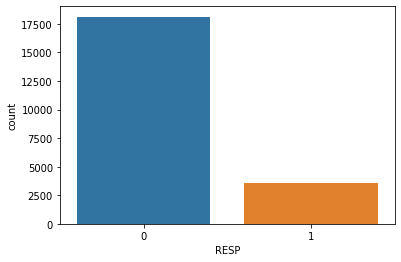

In [ ]:
import seaborn as sns
sns.countplot(x='RESP', data=y)

In [ ]:
X.dtypes

ZIP_CODE          int64
FRE               int64
MON             float64
CC_CARD           int64
AVRG            float64
PC_CALC20         int64
PSWEATERS       float64
PKNIT_TOPS      float64
PKNIT_DRES      float64
PBLOUSES        float64
PJACKETS        float64
PCAR_PNTS       float64
PCAS_PNTS       float64
PSHIRTS         float64
PDRESSES        float64
PSUITS          float64
POUTERWEAR      float64
PJEWELRY        float64
PFASHION        float64
PLEGWEAR        float64
PCOLLSPND       float64
AMSPEND         float64
PSSPEND         float64
CCSPEND         float64
AXSPEND         float64
TMONSPEND       float64
OMONSPEND       float64
SMONSPEND       float64
PREVPD          float64
GMP             float64
PROMOS            int64
DAYS              int64
FREDAYS         float64
MARKDOWN        float64
CLASSES           int64
COUPONS           int64
STYLES            int64
STORES            int64
VALPHON          object
WEB               int64
MAILED            int64
RESPONDED       

## Numerical predictors

### Univariate analysis

In [ ]:
def distplots(X, kde=True):

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/3)) 

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(12/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.histplot(X.iloc[:,i], ax=ax, stat='density', kde=False, alpha= 0.9, edgecolor ='black')
            sns.kdeplot(X.iloc[:,i], ax=ax, alpha= 0.0, color='#333333')
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
            ax.set_yticks([])
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    
    return fig, axes

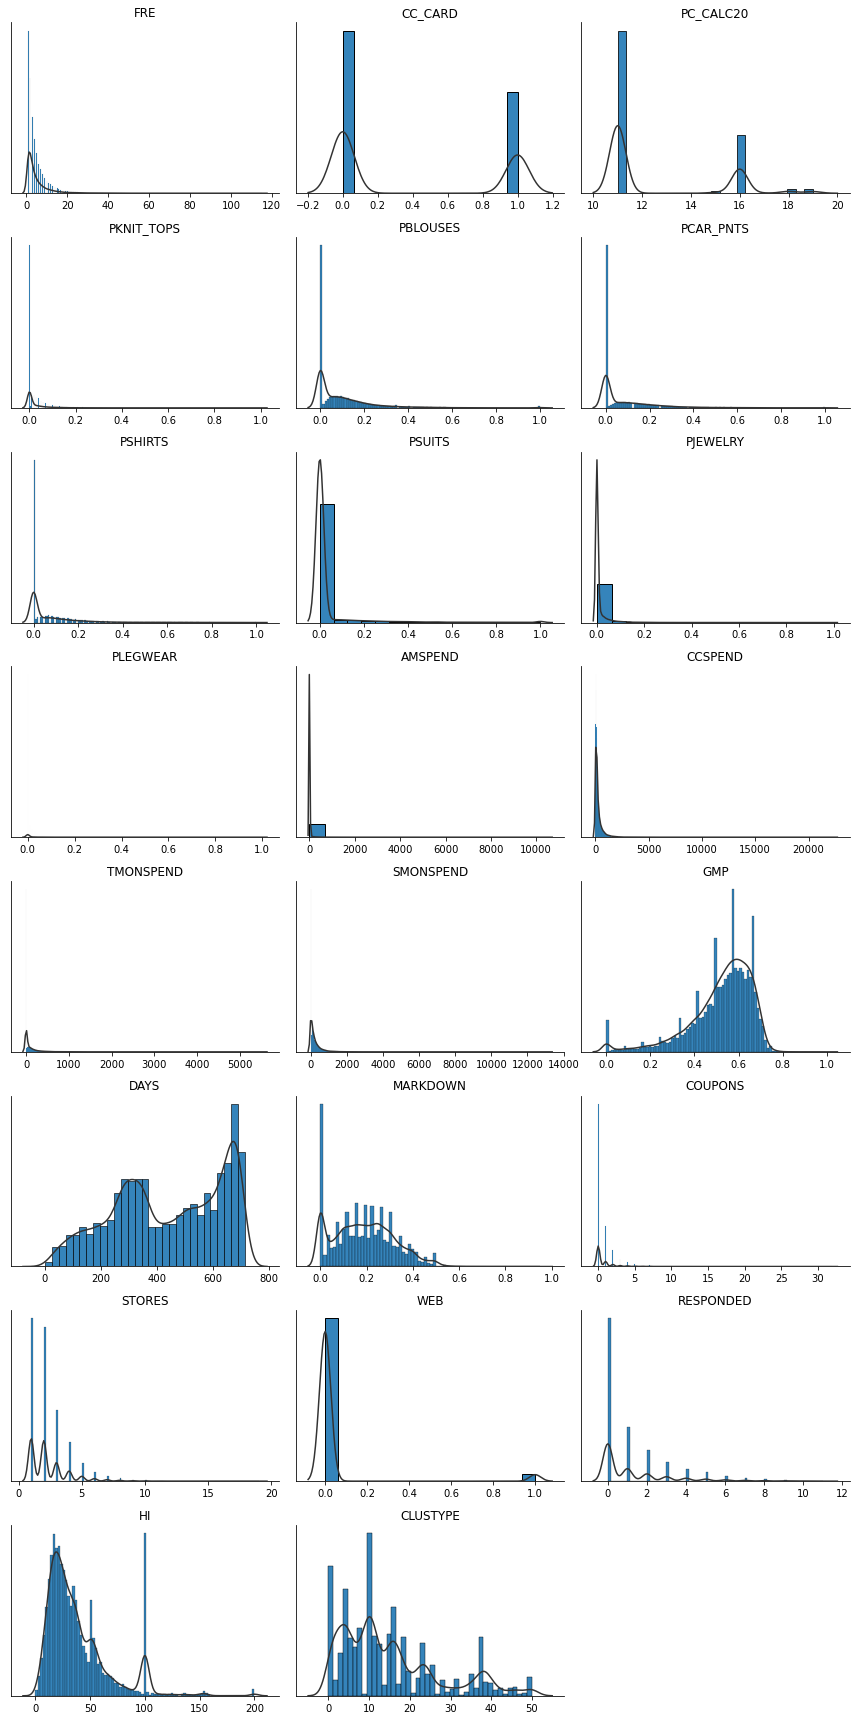

In [ ]:
import matplotlib.pyplot as plt

col = X.columns.values.tolist()
non_num = ['ZIP_CODE','PC_CALC20','VALPHON','WEB','CLUSTYPE']

for i in col:
    col.remove(i)
num = col

num_predictors = X[num]
distplots(num_predictors) 
plt.show()

### Bivariate analysis

In [ ]:
def regplots(X, y):
    colors = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
    sns.set_palette(colors) # set custom color scheme

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/3)) 

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(11/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:          
            sns.regplot(X.iloc[:,i], y,  ci=None, logistic=True, y_jitter=0.05, 
                        scatter_kws={'s': 25, 'alpha':.5},  color=colors[i % 10], ax=ax)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_yticks([])
            ax.set_xticks([])
            ax.set_title(labels[i])
            ax.set_xlim(X.iloc[:,i].min(),X.iloc[:,i].max())
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()

    return fig, axes

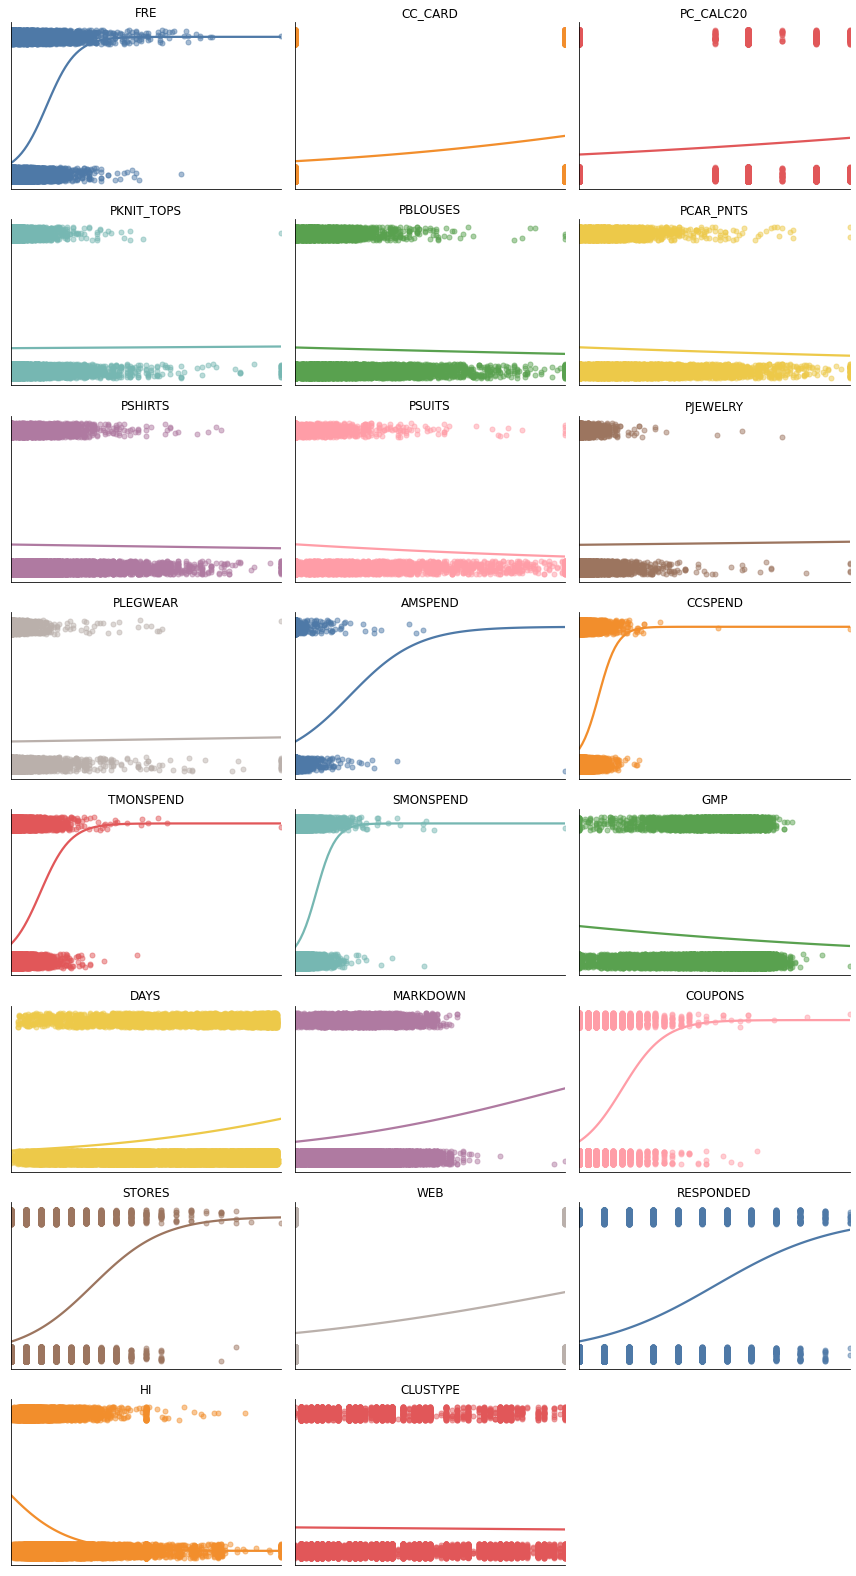

In [ ]:
fig, ax = regplots(num_predictors, y)
plt.show()

<AxesSubplot:>

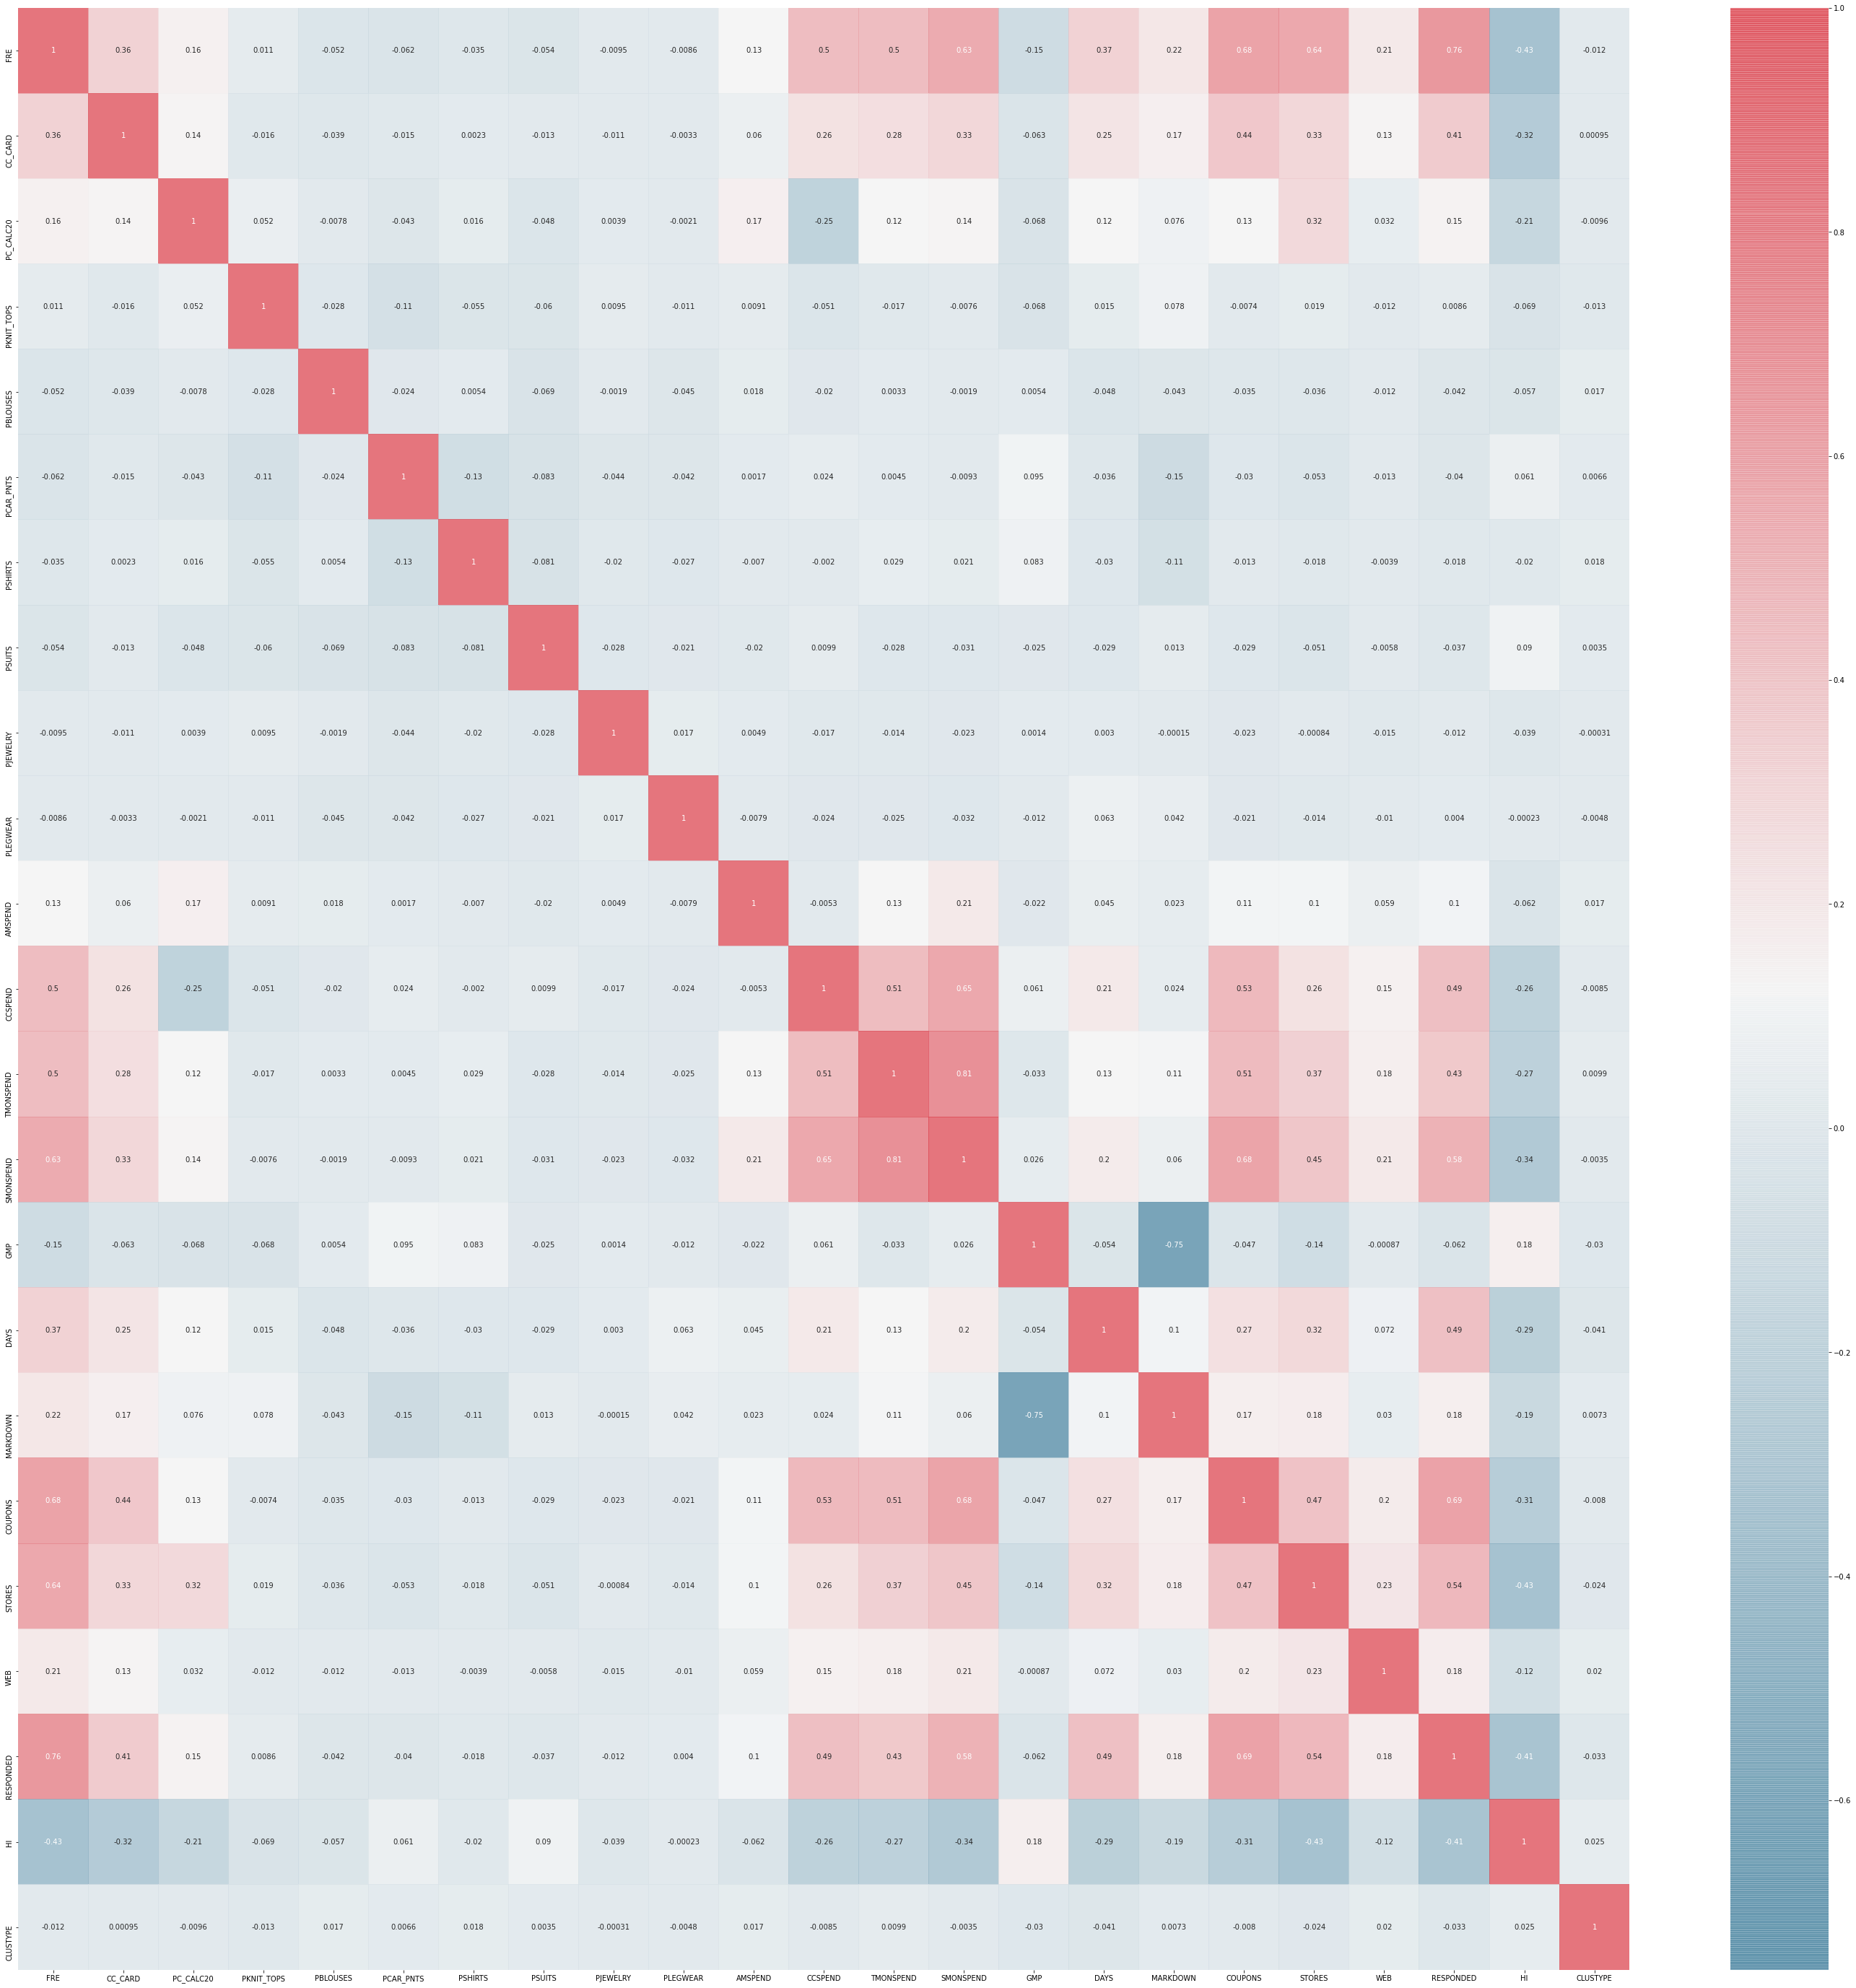

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(50,50))         # Sample figsize in inches
sns.heatmap(num_predictors.corr(), cmap=sns.diverging_palette(230, 10, n=1001), alpha=0.7, annot=True, ax=ax)

## Categorical predictors

### Univariate analysis

In [ ]:
cat = ['PC_CALC20','VALPHON','WEB','CLUSTYPE'] #cc_card PC_CALC20 VALPHON WEB CLUSTYPE
cat_predictors = X[cat]
cat_predictors.columns.values

array(['PC_CALC20', 'VALPHON', 'WEB', 'CLUSTYPE'], dtype=object)

<AxesSubplot:xlabel='PC_CALC20', ylabel='count'>

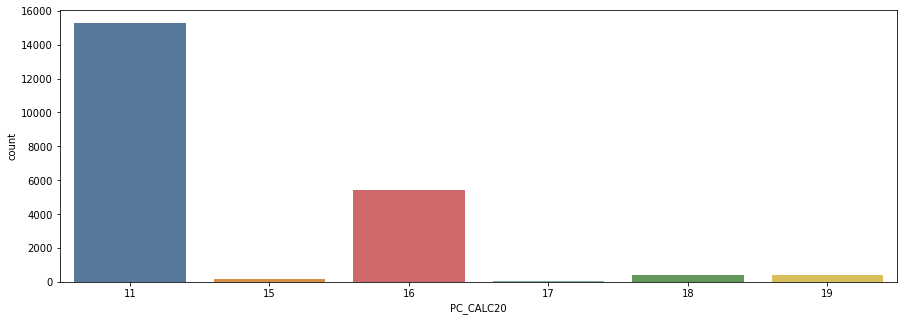

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='PC_CALC20', data=X)

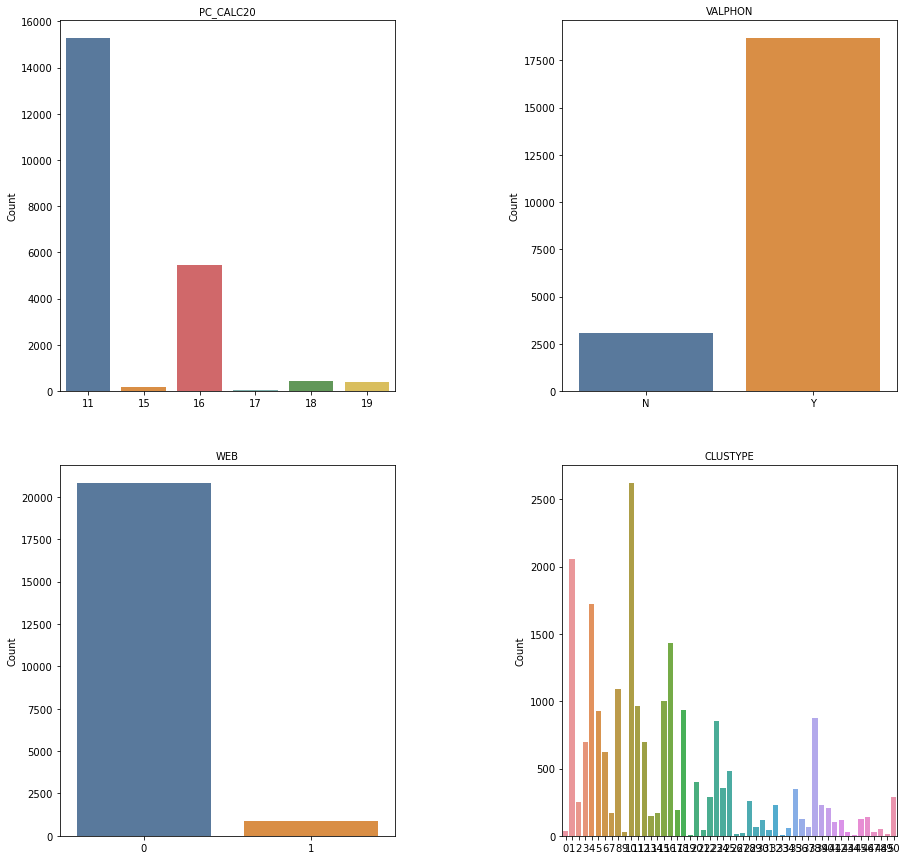

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,15))
ax1, ax2, ax3, ax4 = axes.flatten()
ax = [ax1, ax2, ax3, ax4]
columns = cat

for i in list(range(0,4)):
  sns.countplot(x = columns[i], data = X, ax = ax[i])
  ax[i].set_title(columns[i], fontsize=10)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('Count', fontsize=10)
  ax[i].tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)

### Bivariate analysis

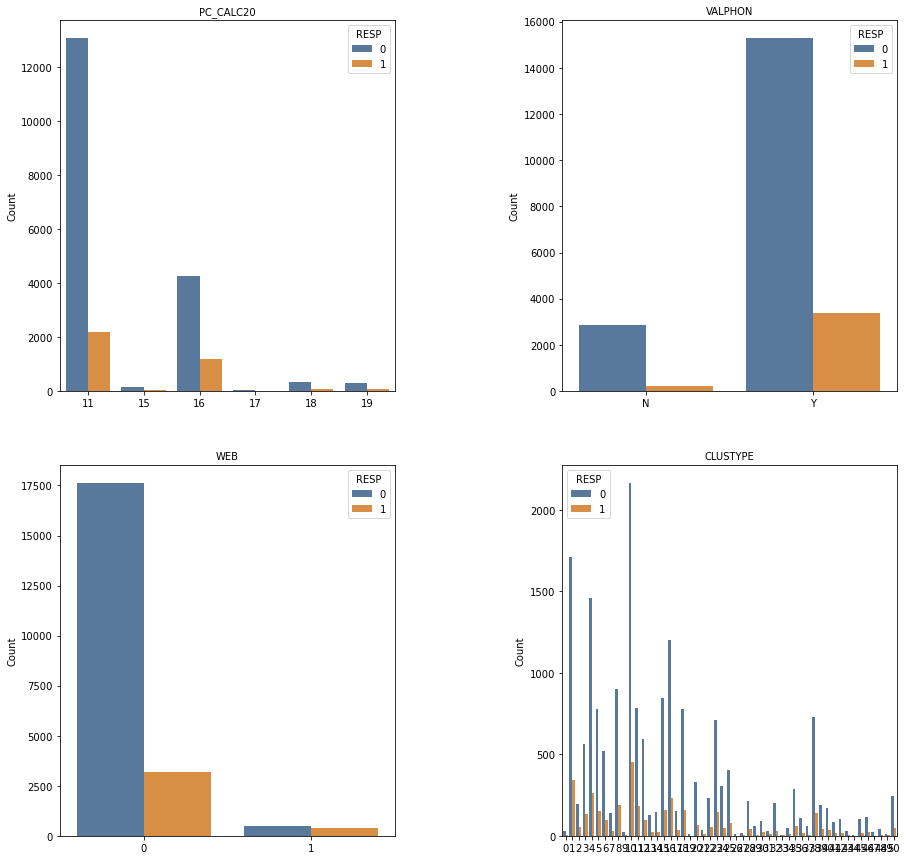

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,15))
ax1, ax2, ax3, ax4 = axes.flatten()
ax = [ax1, ax2, ax3, ax4]
columns = cat

for i in list(range(0,4)):
  sns.countplot(x = columns[i], data = X,hue= data["RESP"], ax = ax[i])
  ax[i].set_title(columns[i], fontsize=10)
  ax[i].set_xlabel('')
  ax[i].set_ylabel('Count', fontsize=10)
  ax[i].tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)

## Feature Engineering

### One-Hot Encoding

In [ ]:
X_fc = X
X_fc = pd.concat([X_fc,pd.get_dummies(X_fc["VALPHON"],prefix='VALPHON')],axis=1)
X_fc.drop(['VALPHON'],axis=1, inplace=True)

### Embedded Feature Selection
* Reduce dimension from 50 to 8

Text(0.5, 1.0, 'Scores of different thresholds')

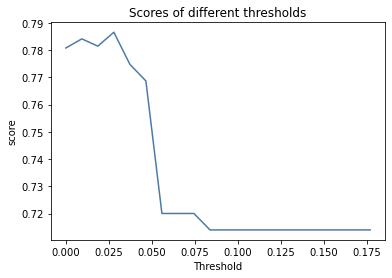

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

RFC_ = RandomForestClassifier(n_estimators =10,random_state=42, class_weight ="balanced")
threshold = np.linspace(0,(RFC_.fit(X_fc,y).feature_importances_).max(),20)
score = []
for i in threshold:
  x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X_fc,y)
  sc = cross_val_score(RFC_,x_embedded,y,cv=5,scoring="roc_auc").mean()
  score.append(sc)
plt.plot(threshold,score)
plt.xlabel("Threshold")
plt.ylabel("score")
plt.title("Scores of different thresholds")

In [ ]:
max_index = score.index(max(score))
res_threshold = threshold[max_index]
print(f"The threshold should be {res_threshold}")

The threshold should be 0.027907237598836232


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

col_original = X_fc.columns.values
print(col_original)
print("\n")

select = SelectFromModel(RFC_,threshold=res_threshold)
X_embedded = select.fit_transform(X_fc,y) 

col = select.get_feature_names_out()
print(col)

X_embedded = pd.DataFrame(X_embedded,columns = col)
X_embedded.head()

['FRE' 'MON' 'CC_CARD' 'AVRG' 'PC_CALC20' 'PSWEATERS' 'PKNIT_TOPS'
 'PKNIT_DRES' 'PBLOUSES' 'PJACKETS' 'PCAR_PNTS' 'PCAS_PNTS' 'PSHIRTS'
 'PDRESSES' 'PSUITS' 'POUTERWEAR' 'PJEWELRY' 'PFASHION' 'PLEGWEAR'
 'PCOLLSPND' 'AMSPEND' 'PSSPEND' 'CCSPEND' 'AXSPEND' 'TMONSPEND'
 'OMONSPEND' 'SMONSPEND' 'PREVPD' 'GMP' 'PROMOS' 'DAYS' 'FREDAYS'
 'MARKDOWN' 'CLASSES' 'COUPONS' 'STYLES' 'STORES' 'WEB' 'MAILED'
 'RESPONDED' 'RESPONSERATE' 'HI' 'LTFREDAY' 'CLUSTYPE' 'PERCRET'
 'VALPHON_N' 'VALPHON_Y']


['FRE' 'MON' 'SMONSPEND' 'DAYS' 'FREDAYS' 'STYLES' 'RESPONDED' 'LTFREDAY']


,FRE,MON,SMONSPEND,DAYS,FREDAYS,STYLES,RESPONDED,LTFREDAY
0,2.0,368.46,0.00,666.0,333.00,11.0,0.0,111.00
1,4.0,258.00,258.00,696.0,174.00,14.0,2.0,43.50
2,2.0,77.00,0.00,343.0,171.50,2.0,0.0,68.60
3,8.0,846.06,373.87,701.0,87.62,35.0,6.0,26.96
4,1.0,87.44,87.44,49.0,49.00,8.0,0.0,24.50


### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_embedded)
scaled = scaler.fit_transform(X_embedded)

### The end of Feature Engineering, train test split and output data for model training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size=0.3, random_state=42)

## Hyperparameter Tuning Section

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

def get_eval(model, para):
    #scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
    scoring = {'AUC': 'roc_auc'}
    grid = GridSearchCV(model, para, cv=10,
                          return_train_score=True, n_jobs= -1,verbose=2,scoring=scoring, refit="AUC")
#     grid.fit(train_resampled, y_train_resampled)
    grid.fit(X_train, y_train)
    
    return grid

# This is a function can return the fitted model before gridsearch CV

def print_eval(final_model):
    
    #y_pred = final_model.predict(valid)
    #print("Test set accuracy: {:.2f}".format(accuracy_score(y_valid, y_pred[0:2000])))
    
   
    print("Training set AUC: {:.2f}\n".format(final_model.score(X_train, y_train)))
    
    print("The Best cross-validation : {}, AUC: {:.2f}".format(final_model.best_estimator_, final_model.best_score_))
    
    
# This is a function can print the test score and training score, also the best CV score and best hyper-parameters.



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameters_rf = {
    "max_features": [6,7,8],
    "max_depth":[3,4,5],
    "n_estimators":[300,400],
    "class_weight":["balanced","balanced_subsample"]
}
rf = get_eval(RandomForestClassifier(),parameters_rf)
print_eval(rf)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Training set AUC: 0.86

The Best cross-validation : RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=7,
                       n_estimators=300), AUC: 0.85


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

parameters_DTC = {"criterion":["gini","entropy"],"max_leaf_nodes":list(range(40,70,5)),"splitter":["best","random"],"class_weight":["balanced","balanced_subsample"]}
DTC = get_eval(DecisionTreeClassifier(),parameters_DTC)
print_eval(DTC)



Fitting 10 folds for each of 48 candidates, totalling 480 fits
Training set AUC: 0.86

The Best cross-validation : DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=40), AUC: 0.83


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters_lr = {
    "penalty": ['l1', 'l2'],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
lr = get_eval(LogisticRegression(), parameters_lr)
print_eval(lr)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:  1.8min finished


Training set AUC: 0.84

The Best cross-validation : LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), AUC: 0.84


### LightGBM

In [ ]:
import lightgbm as lgb
X_train_lgb, X_valid, y_train_lgb, y_valid = train_test_split(X_train, y_train,test_size=0.2,random_state=42,stratify=y_train)

In [ ]:
train_data = lgb.Dataset(X_train_lgb, y_train_lgb)
valid_data = lgb.Dataset(X_valid, y_valid, reference = train_data)

In [ ]:
import optuna
from sklearn.metrics import roc_auc_score
def objective(trial):
  
    
    params = {
        "objective":"binary",
        "metric":"auc",
        "n_esitimators" : 2000,
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        "num_leaves": trial.suggest_int("num_leaves", 2, 40),
        "max_depth": trial.suggest_int("max_depth", 3, 16),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "is_unbalance":True
    }
    
    gbm = lgb.train(params, train_data, num_boost_round=1000) 
    preds = gbm.predict(X_valid)
    auc = roc_auc_score(y_valid, preds)
    return auc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Number of finished trials:", len(study.trials))
print("Best trial:", study.best_trial.params)

[I 2021-11-11 10:34:13,652] A new study created in memory with name: no-name-eb0c94de-f232-4db7-801c-81d07b8f3c35
[I 2021-11-11 10:34:15,839] Trial 0 finished with value: 0.8283511106484066 and parameters: {'learning_rate': 0.035723758332349066, 'lambda_l1': 0.0026409300702782833, 'num_leaves': 35, 'max_depth': 10, 'feature_fraction': 0.6279869092772876, 'bagging_fraction': 0.7243799106259765, 'bagging_freq': 1}. Best is trial 0 with value: 0.8283511106484066.
[I 2021-11-11 10:34:17,648] Trial 1 finished with value: 0.836261384895434 and parameters: {'learning_rate': 0.00012190199625618082, 'lambda_l1': 0.0010987942082817696, 'num_leaves': 20, 'max_depth': 16, 'feature_fraction': 0.4966249025134967, 'bagging_fraction': 0.4259177822477772, 'bagging_freq': 1}. Best is trial 1 with value: 0.836261384895434.
[I 2021-11-11 10:34:19,371] Trial 2 finished with value: 0.8515688835467558 and parameters: {'learning_rate': 0.007598398337760388, 'lambda_l1': 0.0006055916863743763, 'num_leaves': 17

Number of finished trials: 20
Best trial: {'learning_rate': 0.00865773378424155, 'lambda_l1': 1.629490509218376e-07, 'num_leaves': 8, 'max_depth': 3, 'feature_fraction': 0.8230707629542531, 'bagging_fraction': 0.8540163436054242, 'bagging_freq': 3}


In [ ]:
print('Number of finished trials: {}'.format(len(study.trials)))

print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))

print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 20
Best trial:
  Value: 0.8524601154026947
  Params: 
    learning_rate: 0.00865773378424155
    lambda_l1: 1.629490509218376e-07
    num_leaves: 8
    max_depth: 3
    feature_fraction: 0.8230707629542531
    bagging_fraction: 0.8540163436054242
    bagging_freq: 3


In [ ]:
from optuna.visualization import plot_optimization_history
plot_optimization_history(study)

In [ ]:
lgb_model = lgb.LGBMClassifier(n_estimators = 2000,
    boosting_type= 'gbdt',
    objective= 'binary',
    metric= 'auc',
    learning_rate = 0.00865773378424155,
    lambda_l1=  1.629490509218376e-07,
    num_leaves= 8,
     max_depth= 3,
    feature_fraction= 0.8230707629542531,
    bagging_fraction= 0.8540163436054242,
    bagging_freq=3,
    verbose= -1,
    is_unbalance=True,
    num_boost_round= 200)
   # early_stopping_rounds= 100)

In [ ]:
lgb_model.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.8540163436054242, bagging_freq=3,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.8230707629542531, importance_type='split',
               is_unbalance=True, lambda_l1=1.629490509218376e-07,
               learning_rate=0.00865773378424155, max_depth=3, metric='auc',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2000, n_jobs=-1, num_boost_round=200, num_leaves=8,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbose=-1)

In [ ]:
evals_result={}
gbm = lgb.train(params,
                train_data,
                valid_sets = valid_data,
                num_boost_round= 200,
                early_stopping_rounds= 100,
                evals_result=evals_result)

[1]	valid_0's auc: 0.826227
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.832319
[3]	valid_0's auc: 0.838978
[4]	valid_0's auc: 0.840082
[5]	valid_0's auc: 0.841199
[6]	valid_0's auc: 0.841575
[7]	valid_0's auc: 0.842231
[8]	valid_0's auc: 0.843803
[9]	valid_0's auc: 0.841144
[10]	valid_0's auc: 0.842715
[11]	valid_0's auc: 0.840897
[12]	valid_0's auc: 0.841928
[13]	valid_0's auc: 0.843019
[14]	valid_0's auc: 0.843521
[15]	valid_0's auc: 0.844057
[16]	valid_0's auc: 0.843831
[17]	valid_0's auc: 0.843945
[18]	valid_0's auc: 0.843956
[19]	valid_0's auc: 0.843726
[20]	valid_0's auc: 0.844014
[21]	valid_0's auc: 0.843409
[22]	valid_0's auc: 0.844347
[23]	valid_0's auc: 0.844812
[24]	valid_0's auc: 0.845305
[25]	valid_0's auc: 0.845472
[26]	valid_0's auc: 0.845252
[27]	valid_0's auc: 0.845275
[28]	valid_0's auc: 0.845689
[29]	valid_0's auc: 0.845998
[30]	valid_0's auc: 0.846227
[31]	valid_0's auc: 0.846134
[32]	valid_0's auc: 0.846119
[33]	valid_0's auc

In [ ]:
y_pred_gbm = gbm.predict(X_test, num_iteration=gbm.best_iteration)

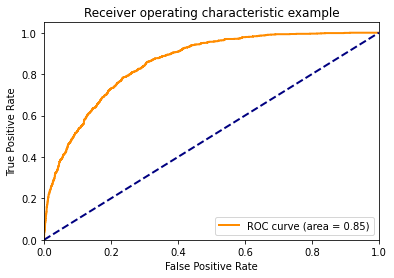

In [ ]:
## AUC plot for test set
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_gbm, pos_label=1)
auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Stacking

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

import timeit
start = timeit.default_timer()

estimators = [('rf', RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=8, n_estimators=400)),
              ('tree',DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=55,splitter='random')),
              ('gbc',GradientBoostingClassifier(learning_rate=0.01, max_features=6, n_estimators=600))
              ]
params = {'rf__max_features': [4,8,16],
          'tree__max_leaf_nodes': [35,45,55],
          'gbc__learning_rate': [0.001,0.01,0.1]
          }

sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

sc_grid_search = GridSearchCV(estimator=sc, param_grid=params, cv=5,scoring='roc_auc')
sc_grid_search.fit(X_train, y_train)

print("Training set AUC:{:3f}".format(sc_grid_search.score(X_train, y_train)))
print("Best parameters:{}".format(sc_grid_search.best_params_))
print("Best cv score:{}".format(sc_grid_search.best_score_))
print("Best estimator:\n{}".format(sc_grid_search.best_estimator_))

stop = timeit.default_timer()
print('Time: ', stop - start)  

Training set AUC:0.861869
Best parameters:{'gbc__learning_rate': 0.01, 'rf__max_features': 8, 'tree__max_leaf_nodes': 55}
Best cv score:0.8466267899335472
Best estimator:
StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       max_features=8,
                                                       n_estimators=400)),
                               ('tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_leaf_nodes=55,
                                                       splitter='random')),
                               ('gbc',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           max_features=6,
                                  

## Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix

### Logistic Regression

In [ ]:
LR = LogisticRegression(C=0.1, class_weight="balanced", dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
LR_best = LR.fit(X_train, y_train)

LR_pred_train = LR_best.predict(X_train)
LR_pred = LR_best.predict(X_test)
# Accuracy
print("LogisticRegression Training Accuracy: {:.2f}".format(accuracy_score(y_train,LR_pred_train)))
print("LogisticRegression Test Accuracy: {:.2f}". format(accuracy_score(y_test, LR_pred)))
# Precision
print("LogisticRegression Precision: {:.2f}".format(precision_score(y_test, LR_pred))) 
# Recall
print("LogisticRegression Recall: {:.2f}".format(recall_score(y_test, LR_pred)))  
# F1
print("LogisticRegression F1: {:.2f}".format(f1_score(y_test, LR_pred)))  

LogisticRegression Training Accuracy: 0.71
LogisticRegression Test Accuracy: 0.71
LogisticRegression Precision: 0.36
LogisticRegression Recall: 0.85
LogisticRegression F1: 0.50


### Decision Tree

In [ ]:
DT = DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=40)

DT_best = DT.fit(X_train, y_train)

DT_pred_train = DT_best.predict(X_train)
DT_pred = DT_best.predict(X_test)
# Accuracy
print("Decision Tree Training Accuracy: {:.2f}".format(accuracy_score(y_train, DT_pred_train)))
print("Decision Tree Test Accuracy: {:.2f}". format(accuracy_score(y_test, DT_pred)))
# AUC
# print("Decision Tree Training AUC: {:.2f}".format(roc_auc_score(y_train,DT_pred_train)))
# print("Decision Tree Test AUC: {:.2f}". format(roc_auc_score(y_test, DT_pred)))
# Precision
print("Decision Tree Precision: {:.2f}".format(precision_score(y_test, DT_pred))) 
# Recall
print("Decision Tree Recall: {:.2f}".format(recall_score(y_test, DT_pred)))  
# F1
print("Decision Tree F1: {:.2f}".format(f1_score(y_test, DT_pred)))  

Decision Tree Training Accuracy: 0.76
Decision Tree Test Accuracy: 0.75
Decision Tree Precision: 0.39
Decision Tree Recall: 0.78
Decision Tree F1: 0.52


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF =  RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=7,
                       n_estimators=300)

RF_best = RF.fit(X_train, y_train)

RF_pred_train = RF_best.predict(X_train)
RF_pred = RF_best.predict(X_test)
# Accuracy
print("Random Forest Training Accuracy: {:.2f}".format(accuracy_score(y_train,RF_pred_train)))
print("Random Forest Tree Test Accuracy: {:.2f}". format(accuracy_score(y_test,RF_pred)))
# # AUC
# print("Random Forest Training AUC: {:.2f}".format(roc_auc_score(y_train, RF_pred_train)))
# print("Random Forest Tree Test AUC: {:.2f}". format(roc_auc_score(y_test, RF_pred)))
# Precision
print("Random Forest Precision: {:.2f}".format(precision_score(y_test, RF_pred))) 
# Recall
print("Random Forest Recall: {:.2f}".format(recall_score(y_test, RF_pred)))  
# F1
print("Random Forest F1: {:.2f}".format(f1_score(y_test, RF_pred)))  

Random Forest Training Accuracy: 0.75
Random Forest Tree Test Accuracy: 0.74
Random Forest Precision: 0.38
Random Forest Recall: 0.82
Random Forest F1: 0.52


### Stacking

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

stacking_predict_result = sc_grid_search.predict(X_test)
# Accuracy
print("Stacking Test Accuracy: {:.2f}". format(accuracy_score(stacking_predict_result, y_test)))
# Precision
print("Stacking Precision: {:.2f}".format(precision_score(y_test, stacking_predict_result))) 
# Recall
print("Stacking Recall: {:.2f}".format(recall_score(y_test, stacking_predict_result)))  
# F1
print("Stacking F1: {:.2f}".format(f1_score(y_test, stacking_predict_result)))  

Stacking Test Accuracy: 0.85
Stacking Precision: 0.64
Stacking Recall: 0.33
Stacking F1: 0.44


### Comparison of different models

In [ ]:
tuned_estimators = [('rf',
                     RandomForestClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       max_features=8,
                                                       n_estimators=400)),
                               ('tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_leaf_nodes=55,
                                                       splitter='random')),
                               ('gbc',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           max_features=6,
                                                           n_estimators=600))]

sc_tuned = StackingClassifier(estimators=tuned_estimators, final_estimator=LogisticRegression())
sc_tuned_fitmodel = sc_tuned.fit(X_train, y_train)

In [ ]:
columns=['Accuracy', 'Precision', 'Recall','F1' ,'AUC']
rows=['Logistic', 'Decision Tree', 'Random Forest',"LighGBM","Stacking"]
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[LR_best, DT_best, RF_best,lgb_model,sc_tuned_fitmodel]

y_prob = np.zeros((len(y_test), len(rows)))

for i, method in enumerate(methods):
    # if method == gbm:
    #  y_prob[:, i] = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    #  y_pred = method.predict(X_test)
    # else:
    y_prob[:, i] = method.predict_proba(X_test)[:, 1]
    y_pred = method.predict(X_test)
        
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 

    results.iloc[i,0] =  accuracy_score(y_test, y_pred)
    results.iloc[i,1] =  precision_score(y_test, y_pred)
    results.iloc[i,2] =  recall_score(y_test, y_pred)
    results.iloc[i,3] =  f1_score(y_test, y_pred)
    results.iloc[i,4] =  roc_auc_score(y_test,y_prob[:,i])
    results.iloc[i,4] =  roc_auc_score(y_test,y_prob[:,i])
   

results.round(3)

,Accuracy,Precision,Recall,F1,AUC
Logistic,0.710,0.356,0.847,0.501,0.847
Decision Tree,0.750,0.387,0.784,0.519,0.840
Random Forest,0.739,0.381,0.824,0.521,0.854
LighGBM,0.772,0.408,0.723,0.521,0.848
Stacking,0.853,0.636,0.337,0.441,0.854


In [ ]:
def plot_roc_curves(y_test, y_probs, labels, sample_weight=None):
    
    fig, ax= plt.subplots(figsize=(9,6))

    N, M=  y_probs.shape

    for i in range(M):
        fpr, tpr, _ = roc_curve(y_test, y_probs[:,i], sample_weight=sample_weight)
        auc = roc_auc_score(y_test, y_probs[:,i], sample_weight=sample_weight)
        ax.plot(1-fpr, tpr, label=labels.iloc[i] + ' (AUC = {:.3f})'.format(auc))
    
    ax.plot([0,1],[1,0], linestyle='--', color='black', alpha=0.6)

    ax.set_xlabel('Specificity')
    ax.set_ylabel('Sensitivity')
    ax.set_title('ROC curves', fontsize=14)
    sns.despine()

    plt.legend(fontsize=13, loc ='lower left' )
    
    return fig, ax

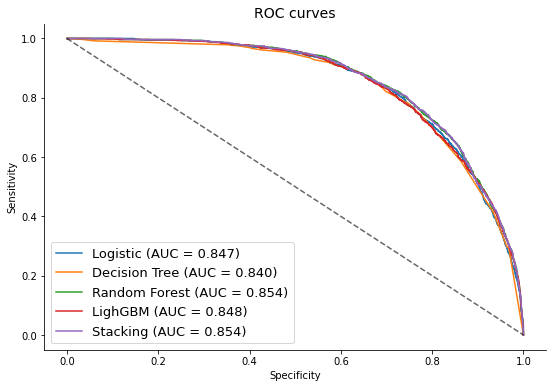

In [ ]:
fig, ax = plot_roc_curves(y_test, y_prob, labels=pd.Series(rows))
plt.show()

# Shap

In [ ]:
import shap

shap.initjs()


explainerDT = shap.TreeExplainer(model_DT)
explainerRF = shap.TreeExplainer(model_RF)
explainerBG = shap.KernelExplainer(model_BG.predict_proba, X_test)
explainerLR = shap.KernelExplainer(model_LR.predict_proba, X_test)

Using 6522 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Using 6522 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


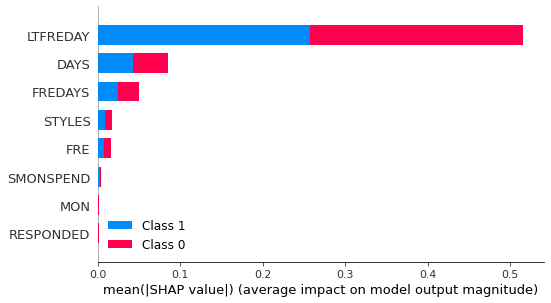

In [ ]:
shap_valuesRF = explainerRF.shap_values(X_test)
shap.summary_plot(shap_valuesRF, X_test, plot_type="bar")

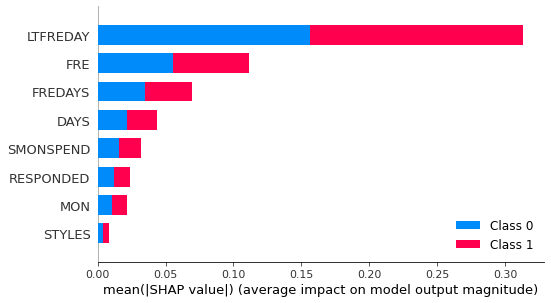

In [ ]:
shap_valuesLR = explainerLR.shap_values(X_test[0:100])
shap.summary_plot(shap_valuesLR, X_test[0:100], plot_type="bar")

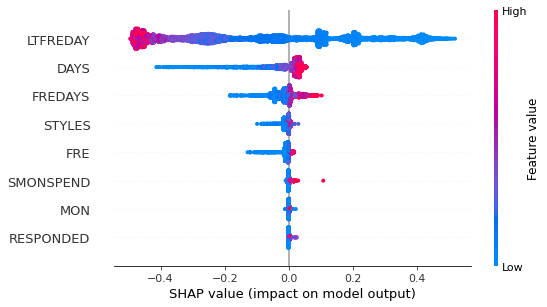

In [ ]:
shap.summary_plot(shap_valuesRF[1],X_test)

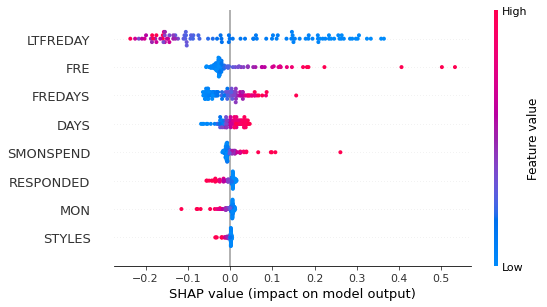

In [ ]:
shap.summary_plot(shap_valuesLR[1][0:100],X_test[0:100])